In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import davies_bouldin_score

In [2]:
df=pd.read_excel("data_luasPanen.xls", header=2)   #import data excel 
df.head(5)
# df

,Jenis Tanaman\nKind of Plants,2017,2018,2019,2020
0,Bawang Daun/ Scallion,7686,9255,11852,13199
1,Bawang Merah/ Shallots,37157,41506,42962,47483
2,Bawang Putih/ Garlic,97,717,1235,1243
3,Bayam/ Spinach,2051,2180,2551,2438
4,Buncis/ string bean,1743,2415,1916,1804


In [3]:
# drop digunakan untuk memotong data kolom
df.drop('Jenis Tanaman\nKind of Plants', axis=1, inplace=True)
df.head(5)

,2017,2018,2019,2020
0,7686,9255,11852,13199
1,37157,41506,42962,47483
2,97,717,1235,1243
3,2051,2180,2551,2438
4,1743,2415,1916,1804


In [10]:
kmeans = KMeans(n_clusters = 3, random_state=0, init="random")
kmeans.fit(df)                                         #melatih data df
kmeans.labels_

array([1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [11]:
predict =kmeans.predict(df)
predict

array([1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [12]:
df['cluster']=predict
df.head(10)

,2017,2018,2019,2020,cluster
0,7686,9255,11852,13199,1
1,37157,41506,42962,47483,2
2,97,717,1235,1243,1
3,2051,2180,2551,2438,1
4,1743,2415,1916,1804,1
5,13674,12289,12190,12078,1
6,68372,70493,67767,78760,0
7,113,62,55,50,1
8,229,370,445,314,1
9,4806,4682,4937,4737,1


In [13]:
db_index = davies_bouldin_score(df, predict)
print(db_index)

0.07714051025494487


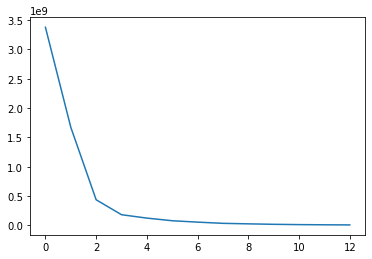

In [14]:
#elbow 
ssd = []
K = range (2,15)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)
#plot SSDs untuk setiap n_clusters
plt.plot(ssd)
#print (ssd)

In [15]:
from sklearn.metrics import silhouette_score
K = range (2,15)
for num_clusters in K:
    
    #inisalisai kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    kluster = kmeans.labels_
    
    #silhouette score
    silhouette_rata2 = silhouette_score(df, kluster)
    print ("for n_clusters={0}, the silhouette score is {1}".format (num_clusters,  silhouette_rata2))

for n_clusters=2, the silhouette score is 0.8671275857645031
for n_clusters=3, the silhouette score is 0.8010260684355875
for n_clusters=4, the silhouette score is 0.6011962980457282
for n_clusters=5, the silhouette score is 0.5376154749927676
for n_clusters=6, the silhouette score is 0.4355641324600429
for n_clusters=7, the silhouette score is 0.5259628921313465
for n_clusters=8, the silhouette score is 0.49261904712077115
for n_clusters=9, the silhouette score is 0.48658373130521354
for n_clusters=10, the silhouette score is 0.46637502134535336
for n_clusters=11, the silhouette score is 0.4441364181437631
for n_clusters=12, the silhouette score is 0.4205562894029382
for n_clusters=13, the silhouette score is 0.3420145734998409
for n_clusters=14, the silhouette score is 0.2832887492276007
